# Time series model

In [32]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, GRU
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import MeanSquaredError
from tensorflow.keras.preprocessing.sequence import TimeseriesGenerator
from tensorflow.keras.metrics import RootMeanSquaredError
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.layers import *

In [4]:
from google.colab import files
uploaded =files.upload()

Saving cleaned_arizona.csv to cleaned_arizona.csv


In [5]:
import io
df=pd.read_csv(io.BytesIO(uploaded['cleaned_arizona.csv']))

df.head()

,validstart,none,d0,d1,d2,d3,d4,region_east_central,region_north_central,region_northeast,region_northwest,region_south_central,region_southeast,region_southwest,climatedivisionsid_201,climatedivisionsid_202,climatedivisionsid_203,climatedivisionsid_204,climatedivisionsid_205,climatedivisionsid_206,climatedivisionsid_207,is_drought_area
0,2021-12-14,0.0,2524.61,4778.24,825.21,0.00,0.0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1
1,2021-12-14,0.0,6015.35,8582.52,0.00,0.00,0.0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,1
2,2021-12-14,0.0,3506.42,5686.56,754.34,85.16,0.0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1
3,2021-12-14,0.0,7545.43,14232.63,1358.43,0.00,0.0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,1
4,2021-12-14,0.0,5175.82,12250.35,16518.12,5894.94,0.0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1


In [6]:
df

,validstart,none,d0,d1,d2,d3,d4,region_east_central,region_north_central,region_northeast,region_northwest,region_south_central,region_southeast,region_southwest,climatedivisionsid_201,climatedivisionsid_202,climatedivisionsid_203,climatedivisionsid_204,climatedivisionsid_205,climatedivisionsid_206,climatedivisionsid_207,is_drought_area
0,2021-12-14,0.00,2524.61,4778.24,825.21,0.00,0.0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1
1,2021-12-14,0.00,6015.35,8582.52,0.00,0.00,0.0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,1
2,2021-12-14,0.00,3506.42,5686.56,754.34,85.16,0.0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1
3,2021-12-14,0.00,7545.43,14232.63,1358.43,0.00,0.0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,1
4,2021-12-14,0.00,5175.82,12250.35,16518.12,5894.94,0.0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7660,2000-12-26,23136.48,0.00,0.00,0.00,0.00,0.0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0
7661,2000-12-26,39839.23,0.00,0.00,0.00,0.00,0.0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0
7662,2000-12-26,8128.06,0.00,0.00,0.00,0.00,0.0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0
7663,2000-12-26,10032.48,0.00,0.00,0.00,0.00,0.0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0


In [10]:
df.iloc[[7]]

,validstart,none,d0,d1,d2,d3,d4,region_east_central,region_north_central,region_northeast,region_northwest,region_south_central,region_southeast,region_southwest,climatedivisionsid_201,climatedivisionsid_202,climatedivisionsid_203,climatedivisionsid_204,climatedivisionsid_205,climatedivisionsid_206,climatedivisionsid_207,is_drought_area
7,2021-12-07,0.0,6048.86,8549.01,0.0,0.0,0.0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,1


In [11]:
new_df=df[0::8]
new_df.head()

,validstart,none,d0,d1,d2,d3,d4,region_east_central,region_north_central,region_northeast,region_northwest,region_south_central,region_southeast,region_southwest,climatedivisionsid_201,climatedivisionsid_202,climatedivisionsid_203,climatedivisionsid_204,climatedivisionsid_205,climatedivisionsid_206,climatedivisionsid_207,is_drought_area
0,2021-12-14,0.0,2524.61,4778.24,825.21,0.0,0.0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1
8,2021-12-07,0.0,2514.26,4788.59,825.21,0.0,0.0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1
16,2021-11-30,0.0,6048.86,8549.01,0.00,0.0,0.0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,1
24,2021-11-23,0.0,1676.56,3118.58,0.00,0.0,0.0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1
32,2021-11-16,0.0,2514.26,4788.59,825.21,0.0,0.0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1


In [12]:
new_df.shape

(959, 22)

In [13]:
new_df.index=pd.to_datetime(new_df['validstart'], format = '%Y.%m.%d')
new_df.head()

,validstart,none,d0,d1,d2,d3,d4,region_east_central,region_north_central,region_northeast,region_northwest,region_south_central,region_southeast,region_southwest,climatedivisionsid_201,climatedivisionsid_202,climatedivisionsid_203,climatedivisionsid_204,climatedivisionsid_205,climatedivisionsid_206,climatedivisionsid_207,is_drought_area
validstart,,,,,,,,,,,,,,,,,,,,,,
2021-12-14,2021-12-14,0.0,2524.61,4778.24,825.21,0.0,0.0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1
2021-12-07,2021-12-07,0.0,2514.26,4788.59,825.21,0.0,0.0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1
2021-11-30,2021-11-30,0.0,6048.86,8549.01,0.00,0.0,0.0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,1
2021-11-23,2021-11-23,0.0,1676.56,3118.58,0.00,0.0,0.0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1
2021-11-16,2021-11-16,0.0,2514.26,4788.59,825.21,0.0,0.0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1


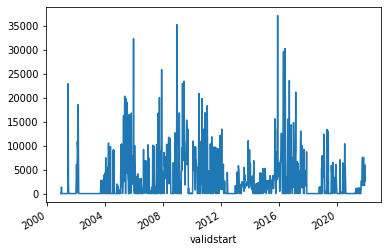

In [14]:
abnormally_dry=new_df['d0']

abnormally_dry.plot();

In [15]:
def df_to_X_y(new_df,window_size=4):
  new_df_as_np=new_df.to_numpy()
  X=[]
  y=[]

  for i in range(len(new_df_as_np)-window_size):
    row = [[a] for a in new_df_as_np[i:i+4]]
    X.append(row)
    label =new_df_as_np[i+4]
    y.append(label)
  return np.array(X), np.array(y)


In [16]:
WINDOW_SIZE =4
X,y = df_to_X_y(abnormally_dry, WINDOW_SIZE)
X.shape, y.shape

((955, 4, 1), (955,))

In [17]:
X

array([[[2524.61],
        [2514.26],
        [6048.86],
        [1676.56]],

       [[2514.26],
        [6048.86],
        [1676.56],
        [2514.26]],

       [[6048.86],
        [1676.56],
        [2514.26],
        [6048.86]],

       ...,

       [[   0.  ],
        [   0.  ],
        [   0.  ],
        [   0.  ]],

       [[   0.  ],
        [   0.  ],
        [   0.  ],
        [1357.85]],

       [[   0.  ],
        [   0.  ],
        [1357.85],
        [   0.  ]]])

In [18]:
X_train, y_train = X[:668], y[:668]
X_val, y_val = X[668:811], y[668:811]
X_test, y_test = X[811:], y[811:] 

X_train.shape, y_train.shape, X_val.shape, y_val.shape, X_test.shape, y_test.shape

((668, 4, 1), (668,), (143, 4, 1), (143,), (144, 4, 1), (144,))

In [44]:
model1 = Sequential()

model1.add(InputLayer((4,1)))

model1.add(LSTM(64))

model1.add(Dense(8, 'relu'))
model1.add(Dense(1, 'linear'))

model1.summary()

Model: "sequential_12"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_1 (LSTM)               (None, 64)                16896     
                                                                 
 dense_10 (Dense)            (None, 8)                 520       
                                                                 
 dense_11 (Dense)            (None, 1)                 9         
                                                                 
Total params: 17,425
Trainable params: 17,425
Non-trainable params: 0
_________________________________________________________________


In [45]:
from tensorflow.python.keras.backend import learning_phase
cp1=ModelCheckpoint('model1/', save_best_only=True)

model1.compile(loss=MeanSquaredError(), optimizer=Adam(learning_rate=.0001), metrics=[RootMeanSquaredError()])

In [46]:
model1.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=10, callbacks=[cp1])

Epoch 1/10
19/21 [==========================>...] - ETA: 0s - loss: 35105036.0000 - root_mean_squared_error: 5924.9502

INFO:tensorflow:Assets written to: model1/assets


INFO:tensorflow:Assets written to: model1/assets


21/21 [==============================] - 8s 264ms/step - loss: 37388812.0000 - root_mean_squared_error: 6114.6392 - val_loss: 41129340.0000 - val_root_mean_squared_error: 6413.2158
Epoch 2/10
11/21 [==============>...............] - ETA: 0s - loss: 41261080.0000 - root_mean_squared_error: 6423.4790

INFO:tensorflow:Assets written to: model1/assets


INFO:tensorflow:Assets written to: model1/assets


21/21 [==============================] - 5s 264ms/step - loss: 37388628.0000 - root_mean_squared_error: 6114.6240 - val_loss: 41129272.0000 - val_root_mean_squared_error: 6413.2109
Epoch 3/10
21/21 [==============================] - ETA: 0s - loss: 37388560.0000 - root_mean_squared_error: 6114.6187

INFO:tensorflow:Assets written to: model1/assets


INFO:tensorflow:Assets written to: model1/assets


21/21 [==============================] - 5s 241ms/step - loss: 37388560.0000 - root_mean_squared_error: 6114.6187 - val_loss: 41129228.0000 - val_root_mean_squared_error: 6413.2075
Epoch 4/10
20/21 [===========================>..] - ETA: 0s - loss: 37059640.0000 - root_mean_squared_error: 6087.6631

INFO:tensorflow:Assets written to: model1/assets


INFO:tensorflow:Assets written to: model1/assets


21/21 [==============================] - 5s 267ms/step - loss: 37388512.0000 - root_mean_squared_error: 6114.6147 - val_loss: 41129200.0000 - val_root_mean_squared_error: 6413.2051
Epoch 5/10
11/21 [==============>...............] - ETA: 0s - loss: 35004156.0000 - root_mean_squared_error: 5916.4312

INFO:tensorflow:Assets written to: model1/assets


INFO:tensorflow:Assets written to: model1/assets


21/21 [==============================] - 5s 264ms/step - loss: 37388492.0000 - root_mean_squared_error: 6114.6128 - val_loss: 41129180.0000 - val_root_mean_squared_error: 6413.2036
Epoch 6/10
14/21 [===================>..........] - ETA: 0s - loss: 40335268.0000 - root_mean_squared_error: 6351.0054

INFO:tensorflow:Assets written to: model1/assets


INFO:tensorflow:Assets written to: model1/assets


21/21 [==============================] - 5s 240ms/step - loss: 37388476.0000 - root_mean_squared_error: 6114.6118 - val_loss: 41129160.0000 - val_root_mean_squared_error: 6413.2021
Epoch 7/10
11/21 [==============>...............] - ETA: 0s - loss: 34737924.0000 - root_mean_squared_error: 5893.8887

INFO:tensorflow:Assets written to: model1/assets


INFO:tensorflow:Assets written to: model1/assets


21/21 [==============================] - 5s 268ms/step - loss: 37388452.0000 - root_mean_squared_error: 6114.6099 - val_loss: 41129144.0000 - val_root_mean_squared_error: 6413.2007
Epoch 8/10
13/21 [=================>............] - ETA: 0s - loss: 35073912.0000 - root_mean_squared_error: 5922.3232

INFO:tensorflow:Assets written to: model1/assets


INFO:tensorflow:Assets written to: model1/assets


21/21 [==============================] - 5s 242ms/step - loss: 37388440.0000 - root_mean_squared_error: 6114.6089 - val_loss: 41129132.0000 - val_root_mean_squared_error: 6413.1997
Epoch 9/10
20/21 [===========================>..] - ETA: 0s - loss: 36830028.0000 - root_mean_squared_error: 6068.7749

INFO:tensorflow:Assets written to: model1/assets


INFO:tensorflow:Assets written to: model1/assets


21/21 [==============================] - 7s 330ms/step - loss: 37388424.0000 - root_mean_squared_error: 6114.6074 - val_loss: 41129112.0000 - val_root_mean_squared_error: 6413.1982
Epoch 10/10
21/21 [==============================] - ETA: 0s - loss: 37388408.0000 - root_mean_squared_error: 6114.6060

INFO:tensorflow:Assets written to: model1/assets


INFO:tensorflow:Assets written to: model1/assets


21/21 [==============================] - 5s 245ms/step - loss: 37388408.0000 - root_mean_squared_error: 6114.6060 - val_loss: 41129096.0000 - val_root_mean_squared_error: 6413.1968


In [47]:
from tensorflow.keras.models import load_model
model1 = load_model('model1/')

In [48]:
train_predictions = model1.predict(X_train).flatten()

train_results=pd.DataFrame(data={'Train Predictions': train_predictions, 'Actual':y_train})

train_results

,Train Predictions,Actual
0,0.020357,2514.26
1,0.020355,6048.86
2,0.020354,7510.08
3,0.020354,5978.38
4,0.020354,1707.49
...,...,...
663,0.020337,0.00
664,0.020339,0.00
665,0.020337,10077.62
666,0.020356,1471.79


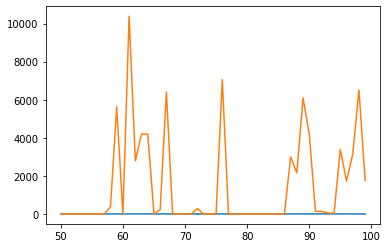

In [49]:
plt.plot(train_results['Train Predictions'][50:100])
plt.plot(train_results['Actual'][50:100]);

In [50]:
val_predictions = model1.predict(X_val).flatten()
val_results = pd.DataFrame(data={'Val Predictions':val_predictions, 'Actual':y_val})
val_results

,Val Predictions,Actual
0,0.020337,1295.97
1,0.020359,0.00
2,0.020338,0.00
3,0.020337,567.00
4,0.020363,567.00
...,...,...
138,0.020337,0.00
139,0.020337,0.00
140,0.020337,0.00
141,0.044503,0.00


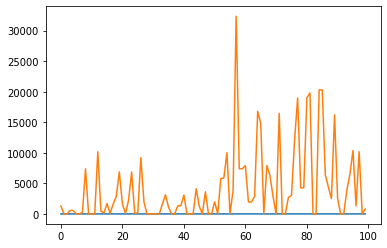

In [51]:
plt.plot(val_results['Val Predictions'][:100])
plt.plot(val_results['Actual'][:100]);

In [53]:
test_predictions = model1.predict(X_test).flatten()
test_results = pd.DataFrame(data={'Test Predictions':test_predictions, 'Actual':y_test})
test_results

,Test Predictions,Actual
0,0.020356,0.00
1,0.020337,0.00
2,0.020337,7453.40
3,0.020357,0.00
4,0.020337,4265.74
...,...,...
139,0.044503,0.00
140,0.044503,0.00
141,0.044503,1357.85
142,0.020358,0.00


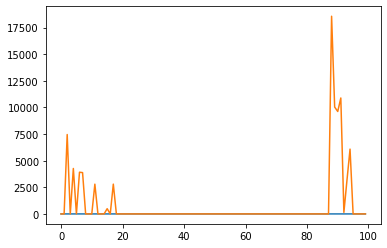

In [54]:
plt.plot(test_results['Test Predictions'][:100])
plt.plot(test_results['Actual'][:100])

In [58]:
from tensorflow.python.keras.losses import mean_squared_error
def plot_predictions1(model, X, y, start=0, end=100):
  predictions = model.predict(X).flatten()
  df = pd.DataFrame(data={'Predictions':predictions, 'Actuals':y})
  plt.plot(df['Predictions'][start:end])
  plt.plot(df['Actuals'][start:end])
  return df, mean_squared_error(y, predictions)

(     Predictions  Actuals
 0       0.020356     0.00
 1       0.020337     0.00
 2       0.020337  7453.40
 3       0.020357     0.00
 4       0.020337  4265.74
 ..           ...      ...
 139     0.044503     0.00
 140     0.044503     0.00
 141     0.044503  1357.85
 142     0.020358     0.00
 143     0.020337     0.00
 
 [144 rows x 2 columns], <tf.Tensor: shape=(), dtype=float32, numpy=9423170.0>)

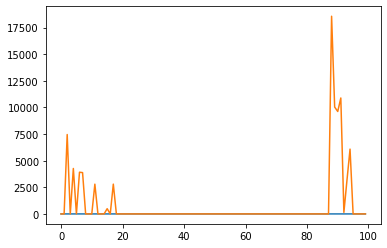

In [59]:
plot_predictions1(model1, X_test, y_test)